In [17]:
import numpy as np
import matplotlib.pyplot as plt

path = "test_img.png"
img = plt.imread(path)

n,m,k = img.shape
print(n,m,k)

3441 4472 4


In [18]:
## coordinates
if n%2 == 0: 
    y = np.arange(-n//2,n//2)
else:
    y = np.arange(-n//2,n//2+1)
if m%2 == 0:
    x = np.arange(-m//2,m//2)
else:
    x = np.arange(-m//2,m//2+1)

xx,yy = np.meshgrid(x,y)
rho_r = np.sqrt(xx**2 + yy**2)

## mask 1
theta = np.arctan2(yy,xx) ## helitical phase
L = 1 # topological core 
mask_1 = np.exp(1j*L*theta)

## mask 2
a = 5
mask_2 = (rho_r >= a)

processed_img = np.empty_like(img)
for i in range(k):
    img_i = img[:,:,i]
    f_img = np.fft.fftshift(np.fft.fft2(img_i),axes = (0,1))
    
    f_img = f_img*mask_2
    
    processed_img[:,:,i] = np.abs(np.fft.ifft2(f_img))

ValueError: operands could not be broadcast together with shapes (3441,4472) (3442,4472) 

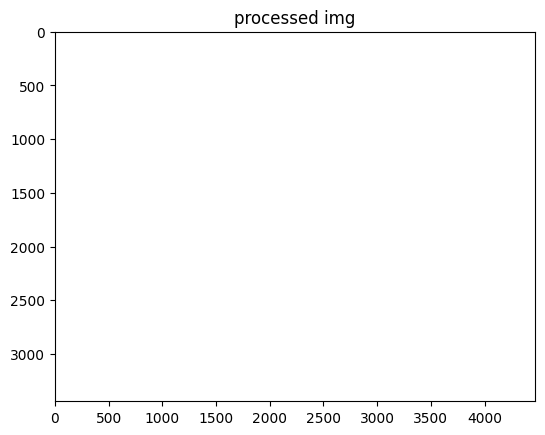

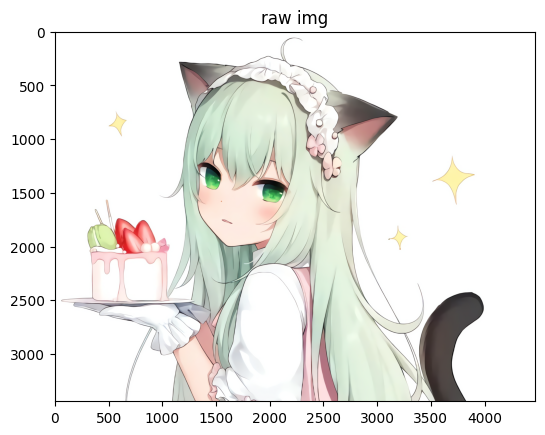

In [16]:
# figrue
plt.figure(1)
plt.imshow(processed_img)
plt.title("processed img")

plt.figure(2)
plt.imshow(img)
plt.title("raw img")

plt.show()